In [21]:
import pandas as pd
import numpy as np

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 50)


# Baseline BER Prediction using Random Forest

**Objective:**  
Evaluate predictive performance of top-ranked features based on Practical Score.  

**Approach:**  
- Use **Random Forest Regressor** as baseline.  
- Evaluate different top-N feature subsets: 40, 35, 30, 25, 20.  
- Metrics: RMSE and R².  
- Goal: Identify **minimal feature subset** maintaining good predictive performance.


In [4]:
# Load feature data (X)
X_full = pd.read_csv(r'..\dataset\BER_Features_Prepared.csv')
print("Feature data shape:", X_full.shape)
X_full.head()

# Load target data (y)
y_full = pd.read_csv(r'..\dataset\BERPublicSearch_Cleaned.csv')
y = y_full['BerRating']
print("Target data shape:", y.shape)

Feature data shape: (50000, 112)
Target data shape: (50000,)


In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_full, y, test_size=0.2, random_state=0
)

print("Train shape:", X_train.shape, "Test shape:", X_test.shape)

Train shape: (40000, 112) Test shape: (10000, 112)


In [6]:
# Load feature ranking
feature_rank = pd.read_csv(r'..\dataset\final_feature_ranking.csv')

In [9]:
# Select top 40 features
top40_features = feature_rank.head(40)['BaseFeature'].tolist()
feature_rank.head(40)

,PracticalRank,BaseFeature,Category,Availability,RF_Importance,GB_Importance,Lasso_Importance,MeanImportance,AvailabilityWeight,PracticalScore
0,1,GroundFloorArea(sq m),Geometry,Easy,0.001578,0.005562,0.752635,0.253259,1.0,0.253259
1,2,UValueWall,Envelope,Medium,0.395892,0.341342,0.000000,0.245745,0.7,0.172021
2,3,UValueWindow,Envelope,Medium,0.172326,0.130826,0.000000,0.101051,0.7,0.070735
3,4,DistributionLosses,Losses,Medium,0.001309,0.001737,0.118359,0.040468,0.7,0.028328
4,5,UValueRoof,Envelope,Medium,0.040072,0.067825,0.000000,0.035966,0.7,0.025176
5,6,HSMainSystemEfficiency,Heating Efficiency,Medium,0.014692,0.017848,0.035081,0.022540,0.7,0.015778
6,7,UValueFloor,Envelope,Medium,0.010639,0.056039,0.000000,0.022226,0.7,0.015558
7,8,Year_of_Construction,Geometry,Easy,0.010586,0.017969,0.000000,0.009519,1.0,0.009519
8,9,TempAdjustment,Ventilation,Medium,0.000276,0.035256,0.000000,0.011844,0.7,0.008291
9,10,WHMainSystemEff,Hot Water,Medium,0.005121,0.014768,0.000000,0.006629,0.7,0.004641


In [15]:
X_train_40 = X_train[top40_features]
X_test_40 = X_test[top40_features]

# Numeric columns have no missing
numeric_cols = X_train_40.select_dtypes(include=np.number).columns.tolist()

# Only handle categorical columns
categorical_cols = X_train_40.select_dtypes(include='object').columns.tolist()

In [17]:


# Categorical: fill missing (if any) and one-hot encode
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing (numeric pass-through)
preprocessor = ColumnTransformer(transformers=[
    ('num', 'passthrough', numeric_cols),
    ('cat', categorical_transformer, categorical_cols)
])


In [18]:
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=500, random_state=42, n_jobs=-1))
])

In [19]:
rf_pipeline.fit(X_train_40, y_train)
y_pred_40 = rf_pipeline.predict(X_test_40)

In [22]:
rmse_40 = np.sqrt(mean_squared_error(y_test, y_pred_40))
r2_40 = r2_score(y_test, y_pred_40)

print(f"Top 40 Features → RMSE: {rmse_40:.3f}, R²: {r2_40:.3f}")

Top 40 Features → RMSE: 32.724, R²: 0.943


In [23]:
top30_features = feature_rank.head(30)['BaseFeature'].tolist()
feature_rank.head(30)

,PracticalRank,BaseFeature,Category,Availability,RF_Importance,GB_Importance,Lasso_Importance,MeanImportance,AvailabilityWeight,PracticalScore
0,1,GroundFloorArea(sq m),Geometry,Easy,0.001578,0.005562,0.752635,0.253259,1.0,0.253259
1,2,UValueWall,Envelope,Medium,0.395892,0.341342,0.000000,0.245745,0.7,0.172021
2,3,UValueWindow,Envelope,Medium,0.172326,0.130826,0.000000,0.101051,0.7,0.070735
3,4,DistributionLosses,Losses,Medium,0.001309,0.001737,0.118359,0.040468,0.7,0.028328
4,5,UValueRoof,Envelope,Medium,0.040072,0.067825,0.000000,0.035966,0.7,0.025176
5,6,HSMainSystemEfficiency,Heating Efficiency,Medium,0.014692,0.017848,0.035081,0.022540,0.7,0.015778
6,7,UValueFloor,Envelope,Medium,0.010639,0.056039,0.000000,0.022226,0.7,0.015558
7,8,Year_of_Construction,Geometry,Easy,0.010586,0.017969,0.000000,0.009519,1.0,0.009519
8,9,TempAdjustment,Ventilation,Medium,0.000276,0.035256,0.000000,0.011844,0.7,0.008291
9,10,WHMainSystemEff,Hot Water,Medium,0.005121,0.014768,0.000000,0.006629,0.7,0.004641


In [24]:
X_train_30 = X_train[top30_features]
X_test_30 = X_test[top30_features]

numeric_cols = X_train_30.select_dtypes(include=np.number).columns.tolist()
categorical_cols = X_train_30.select_dtypes(include='object').columns.tolist()

In [25]:
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(transformers=[
    ('num', 'passthrough', numeric_cols),
    ('cat', categorical_transformer, categorical_cols)
])


In [26]:
rf_pipeline_30 = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=500, random_state=42, n_jobs=-1))
])

In [27]:
rf_pipeline_30.fit(X_train_30, y_train)
y_pred_30 = rf_pipeline_30.predict(X_test_30)

In [28]:
rmse_30 = np.sqrt(mean_squared_error(y_test, y_pred_30))
r2_30 = r2_score(y_test, y_pred_30)

print(f"Top 30 Features → RMSE: {rmse_30:.3f}, R²: {r2_30:.3f}")

Top 30 Features → RMSE: 34.101, R²: 0.938


In [29]:
top20_features = feature_rank.head(20)['BaseFeature'].tolist()
feature_rank.head(20)

,PracticalRank,BaseFeature,Category,Availability,RF_Importance,GB_Importance,Lasso_Importance,MeanImportance,AvailabilityWeight,PracticalScore
0,1,GroundFloorArea(sq m),Geometry,Easy,0.001578,0.005562,0.752635,0.253259,1.0,0.253259
1,2,UValueWall,Envelope,Medium,0.395892,0.341342,0.000000,0.245745,0.7,0.172021
2,3,UValueWindow,Envelope,Medium,0.172326,0.130826,0.000000,0.101051,0.7,0.070735
3,4,DistributionLosses,Losses,Medium,0.001309,0.001737,0.118359,0.040468,0.7,0.028328
4,5,UValueRoof,Envelope,Medium,0.040072,0.067825,0.000000,0.035966,0.7,0.025176
5,6,HSMainSystemEfficiency,Heating Efficiency,Medium,0.014692,0.017848,0.035081,0.022540,0.7,0.015778
6,7,UValueFloor,Envelope,Medium,0.010639,0.056039,0.000000,0.022226,0.7,0.015558
7,8,Year_of_Construction,Geometry,Easy,0.010586,0.017969,0.000000,0.009519,1.0,0.009519
8,9,TempAdjustment,Ventilation,Medium,0.000276,0.035256,0.000000,0.011844,0.7,0.008291
9,10,WHMainSystemEff,Hot Water,Medium,0.005121,0.014768,0.000000,0.006629,0.7,0.004641


In [30]:
X_train_20 = X_train[top20_features]
X_test_20 = X_test[top20_features]

numeric_cols = X_train_20.select_dtypes(include=np.number).columns.tolist()
categorical_cols = X_train_20.select_dtypes(include='object').columns.tolist()

In [31]:

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(transformers=[
    ('num', 'passthrough', numeric_cols),
    ('cat', categorical_transformer, categorical_cols)
])


In [32]:
rf_pipeline_20 = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=500, random_state=42, n_jobs=-1))
])

In [33]:
rf_pipeline_20.fit(X_train_20, y_train)
y_pred_20 = rf_pipeline_20.predict(X_test_20)

In [34]:
rmse_20 = np.sqrt(mean_squared_error(y_test, y_pred_20))
r2_20 = r2_score(y_test, y_pred_20)

print(f"Top 20 Features → RMSE: {rmse_20:.3f}, R²: {r2_20:.3f}")

Top 20 Features → RMSE: 34.331, R²: 0.937


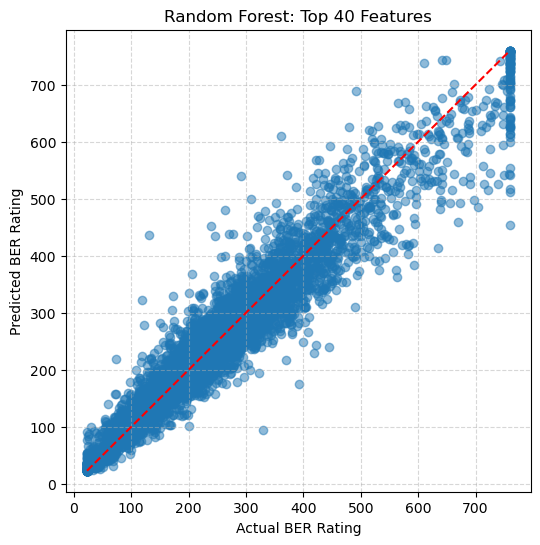

In [36]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_40, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual BER Rating')
plt.ylabel('Predicted BER Rating')
plt.title('Random Forest: Top 40 Features')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


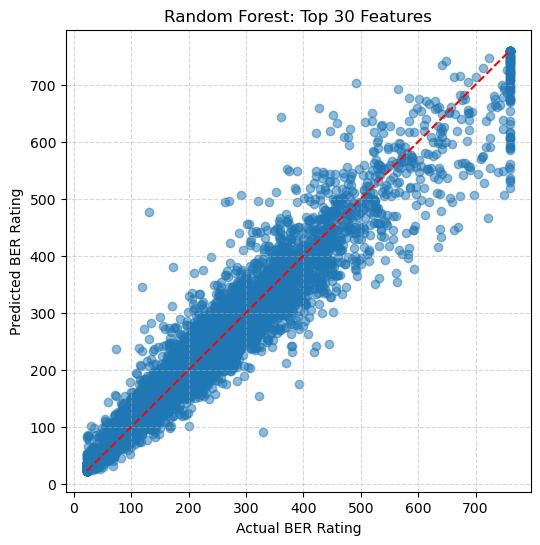

In [38]:


plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_30, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual BER Rating')
plt.ylabel('Predicted BER Rating')
plt.title('Random Forest: Top 30 Features')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


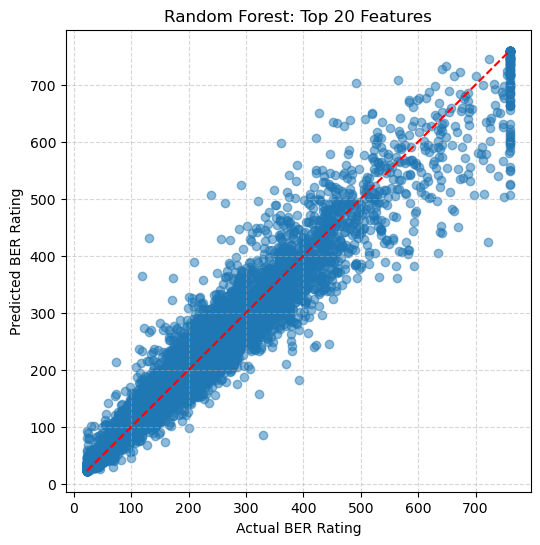

In [39]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_20, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual BER Rating')
plt.ylabel('Predicted BER Rating')
plt.title('Random Forest: Top 20 Features')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


In [40]:
summary_df = pd.DataFrame({
    'TopFeatures': ['40', '30', '20'],
    'RMSE': [rmse_40, rmse_30, rmse_20],
    'R2': [r2_40, r2_30, r2_20]
})


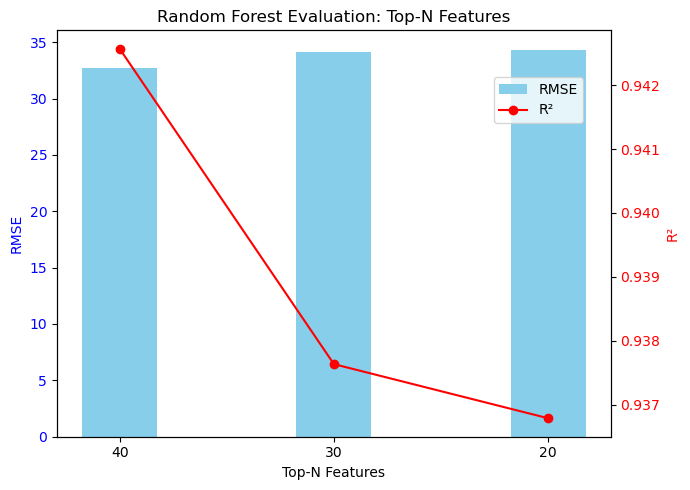

In [41]:
x = np.arange(len(summary_df['TopFeatures']))
width = 0.35

fig, ax1 = plt.subplots(figsize=(7,5))

# RMSE bars
ax1.bar(x, summary_df['RMSE'], width, color='skyblue', label='RMSE')
ax1.set_xlabel('Top-N Features')
ax1.set_ylabel('RMSE', color='blue')
ax1.set_xticks(x)
ax1.set_xticklabels(summary_df['TopFeatures'])
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_title('Random Forest Evaluation: Top-N Features')

# R² line
ax2 = ax1.twinx()
ax2.plot(x, summary_df['R2'], color='red', marker='o', label='R²')
ax2.set_ylabel('R²', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Legend
fig.legend(loc='upper right', bbox_to_anchor=(0.85,0.85))
fig.tight_layout()
plt.show()